In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import silhouette_score

In [106]:
#load dataset
data = pd.read_csv('C:/Users/raiqa/github/Dubai_UG-16/data/dataset/feature_selection/resample_encoded_20_features.csv')

In [107]:
#preprocessing
X = data.drop(columns=['HeartDisease_Yes'])  # Drop target column
Y= data['HeartDisease_Yes']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [108]:
#dimensionality reduction for 2D visualization
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

In [109]:
# Define range for the number of clusters
range_for_clusters = range(2, 10)
bic_scores = []

In [110]:
for k in range_for_clusters:
    # Fitting gmm with k clusters
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(X_pca)

    # Calculate BIC for the current number cluster number
    bic_scores.append(gmm.bic(X_pca))

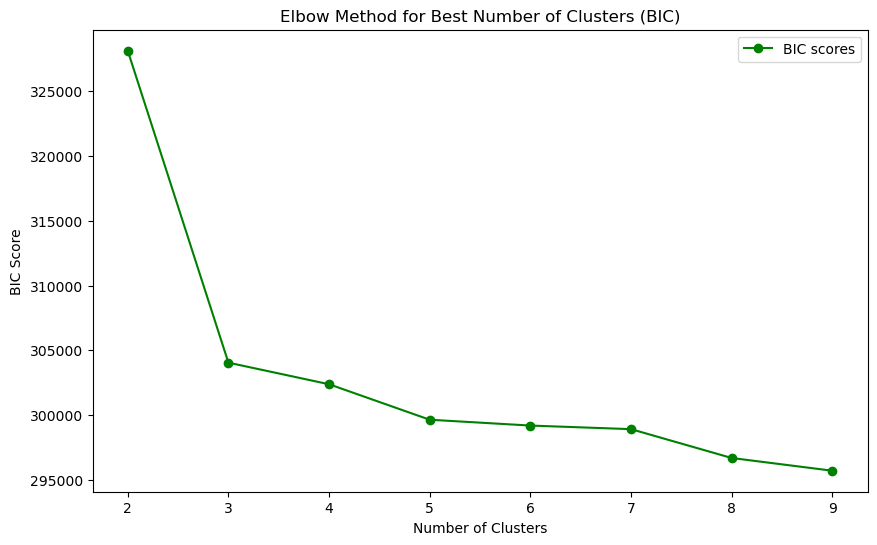

In [111]:
# Plot the BIC scores for each number of cluster
plt.figure(figsize=(10, 6))
plt.plot(range_for_clusters, bic_scores, marker='o', color='green', label="BIC scores")
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.title('Elbow Method for Best Number of Clusters (BIC)')
plt.legend()
plt.show()


In [112]:
# to sore silhouette scores for each cluster number
silhouette_scores = []

In [113]:
for k in range_for_clusters:
    # Fitting gmm with k clusters
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(X_pca)
    
    # Predict cluster labels and silhouette score calculated
    cluster_labels = gmm.predict(X_pca)
    silhouette_average = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_average)


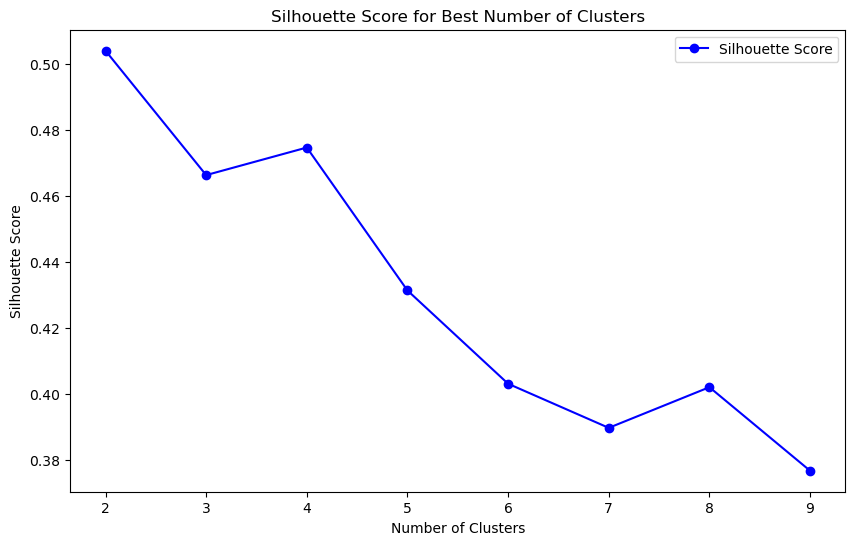

In [114]:
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_for_clusters, silhouette_scores, marker='o', color='blue', label="Silhouette Score")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Best Number of Clusters')
plt.legend()
plt.show()


In [115]:
# Optimal number of clusters based on previous analysis
best_cluster_num = 2

In [116]:
# Fit GMM with the best cluster number
gmm = GaussianMixture(n_components=best_cluster_num, covariance_type='full', random_state=42)
gmm.fit(X_pca)


GaussianMixture(n_components=2, random_state=42)

In [117]:
# Predict cluster labels
cluster_labels = gmm.predict(X_pca)

In [118]:
# Add the labels to the DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels


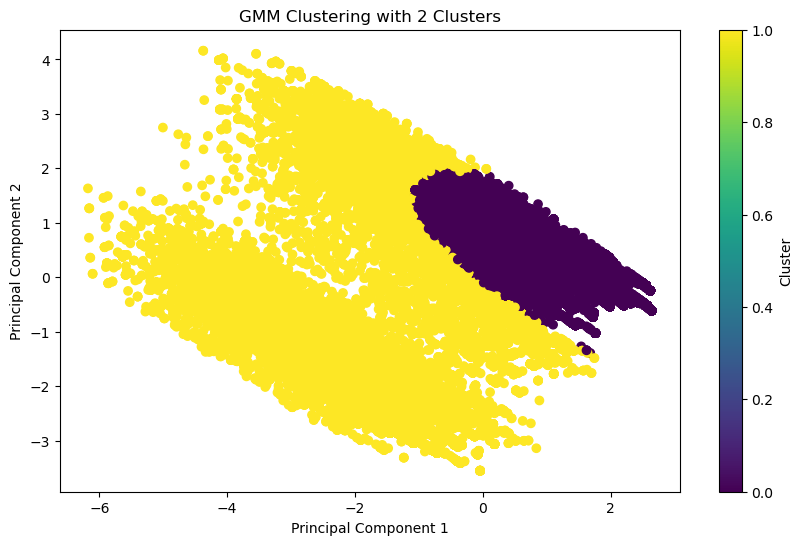

In [119]:
# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'GMM Clustering with {best_cluster_num} Clusters')
plt.colorbar(label='Cluster')
plt.show()

HeartDisease_Yes       0.0       1.0
Cluster                             
0                 0.627118  0.372882
1                 0.272043  0.727957


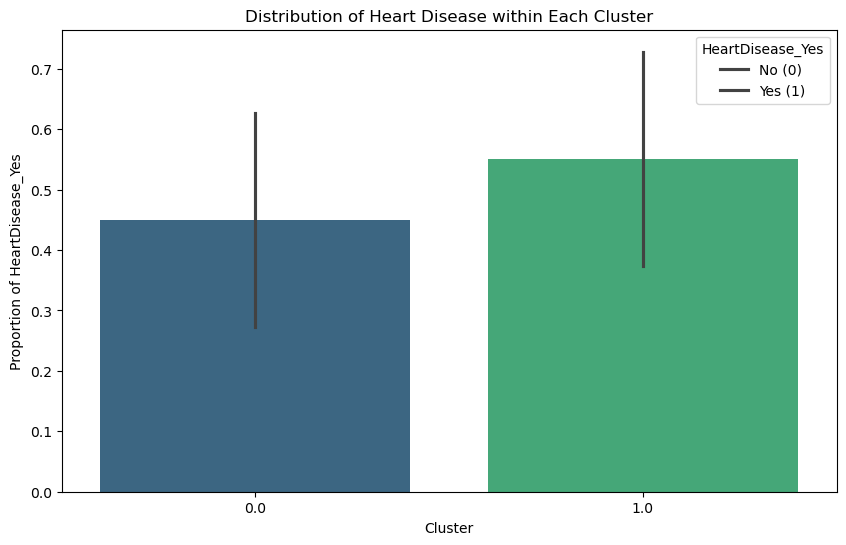

In [120]:
pca_df['HeartDisease_Yes'] = Y.values

# Calculate the distribution of HeartDisease_Yes within each cluster
cluster_distribution  = pca_df.groupby('Cluster')['HeartDisease_Yes'].value_counts(normalize=True).unstack()
print(cluster_distribution)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_distribution, palette='viridis')
plt.title("Distribution of Heart Disease within Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Proportion of HeartDisease_Yes")
plt.legend(title='HeartDisease_Yes', labels=['No (0)', 'Yes (1)'])
plt.show()

In [121]:
data['Cluster'] = cluster_labels
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

         GenHealth  DiffWalking_Yes  Diabetic_Yes  Diabetic_No  \
Cluster                                                          
0         2.628003         0.090221      0.000000     0.999429   
1         1.426712         0.525437      0.623188     0.286951   

         PhysicalHealth  Stroke_Yes  AgeCategory_80 or older  Smoking_Yes  \
Cluster                                                                     
0              2.177328    0.040425                 0.104934     0.438248   
1             11.431272    0.190481                 0.183155     0.590655   

         KidneyDisease_Yes  AgeCategory_18-24  ...  AgeCategory_35-39  \
Cluster                                        ...                      
0                 0.021741           0.057481  ...           0.056338   
1                 0.180645           0.003433  ...           0.013115   

         AgeCategory_30-34  PhysicalActivity_Yes  AgeCategory_75-79  \
Cluster                                                       